# Homework 4

## Christopher Calizzi and Nathan Hardham

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [2]:
df = pd.read_csv('nyc-taxi-data.csv.bz2')
df

07290D3599E7A0D62097A346EFCC1FB5  E7750A37CAB07D0DFF0AF7E3573AC141  \
0      22D70BF00EEB0ADC83BA8177BB861991  3FF2709163DE7036FCAA4E5A3324E4BF   
1      0EC22AAF491A8BD91F279350C2B010FD  778C92B26AE78A9EBDF96B49C67E4007   
2      1390FB380189DF6BBFDA4DC847CAD14F  BE317B986700F63C43438482792C8654   
3      3B4129883A1D05BE89F2C929DE136281  7077F9FD5AD649AEACA4746B2537E3FA   
4      5FAA7F69213D26A42FA435CA9511A4FF  00B7691D86D96AEBD21DD9E138F90840   
...                                 ...                               ...   
49994  A0AFE6B722F15B7A0FDFEEA954BE316A  93D505C96BD248DC390FD47F747D762D   
49995  A0DEAEC3D5592AE94B876356F12F8158  6A35995FBD5399AB131B89623C344782   
49996  A154EFA0695A29423B078C7F5D5B2CB5  F38E7C3381F28C9B3E51C0B6DDBDF68A   
49997  A2B97CECFEA4C8DE45D8FC251E80AF1D  68AE01DDBDEDDFF772905561744A1072   
49998  A3162ED937438746E5269909C0E5AAA1  8313CA0A78F4404DCEB35FD6D8CEEB66   

       2013-01-01 00:00:00  2013-01-01 00:02:00  120  0.44  -73.956528  \
0      2013-01-01 00:02:00  2013-01-01 00:02:00    0  0.00    0.000000   
1      2013-01-01 00:01:00  2013-01-01 00:03:00  120  0.71  -73.973145   
2      2013-01-01 00:01:00  2013-01-01 00:03:00  120  0.48  -74.004173   
3      2013-01-01 00:01:00  2013-01-01 00:03:00  120  0.61  -73.987373   
4      2013-01-01 00:02:00  2013-01-01 00:03:00   60  0.00    0.000000   
...                    ...                  ...  ...   ...         ...   
49994  2013-01-01 03:44:00  2013-01-01 03:46:00  120  0.79  -73.963593   
49995  2013-01-01 03:35:00  2013-01-01 03:46:00  660  2.41  -73.955833   
49996  2013-01-01 03:40:00  2013-01-01 03:46:00  360  1.63  -73.963951   
49997  2013-01-01 03:34:00  2013-01-01 03:46:00  720  4.04  -73.952759   
49998  2013-01-01 03:37:00  2013-01-01 03:46:00  540  2.11  -73.904488   

       40.716976  -73.962440  40.715008  CSH  3.50  0.50  0.50.1  0.00  \
0       0.000000    0.000000   0.000000  CSH  27.0   0.0     0.5  0.00   
1      40.752827  -73.965897  40.760445  CSH   4.0   0.5     0.5  0.00   
2      40.720947  -74.003838  40.726189  CSH   4.0   0.5     0.5  0.00   
3      40.724861  -73.983772  40.730995  CRD   4.0   0.5     0.5  0.00   
4       0.000000    0.000000   0.000000  CRD   2.5   0.5     0.5  0.25   
...          ...         ...        ...  ...   ...   ...     ...   ...   
49994  40.710941  -74.027779  40.629894  CSH   4.5   0.5     0.5  0.00   
49995  40.768272  -73.987724  40.775490  CRD  10.0   0.5     0.5  2.10   
49996  40.709934  -73.949364  40.695381  CRD   7.0   0.5     0.5  2.25   
49997  40.776524  -73.983093  40.738796  CRD  14.5   0.5     0.5  3.00   
49998  40.771713  -73.930023  40.764332  CSH   9.0   0.5     0.5  0.00   

       0.00.1   4.50  
0         0.0  27.50  
1         0.0   5.00  
2         0.0   5.00  
3         0.0   5.00  
4         0.0   3.75  
...       ...    ...  
49994     0.0   5.50  
49995     0.0  13.10  
49996     0.0  10.25  
49997     0.0  18.50  
49998     0.0  10.00  

[49999 rows x 17 columns]

## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe).
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

In [3]:
df = pd.read_csv('nyc-taxi-data.csv.bz2', names = ["medallion", "hack license", "pickup datetime",
                                                                      "dropoff datetime", "trip time in secs", 
                                                                      "trip distance", "pickup longitude",
                                                                      "pickup latitude", "dropoff longitude",
                                                                      "dropoff latitude", "payment type", "fare amount",
                                                                      "surcharge", "mta tax", "trip amount",
                                                                      "tolls amount", "total amount"])

In [4]:
df = df[(df["trip distance"] >= 1) | (df["fare amount"] <= 20)]

In [5]:
df = df[(df["trip distance"] <= 100) | (df["trip time in secs"] <= 60)]

This operation filters the dataframe by excluding trips with an excessive distance or brief time

In [6]:
df = df[(df["total amount"] >= 1) | (df["total amount"] <= 100)]

This operation filters the dataframe by excluding trips with a very small cost or very high cost

## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

0.774076883198666

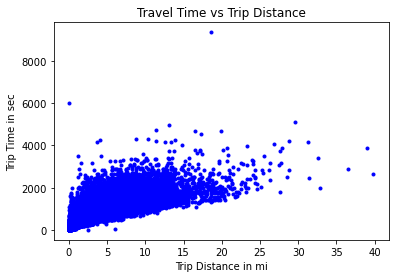

In [7]:
plt.scatter(df["trip distance"], df["trip time in secs"], c = "blue", marker = ".")
p_df = df[["trip distance", "trip time in secs"]]
plt.ylabel("Trip Time in sec")
plt.xlabel("Trip Distance in mi")
plt.title("Travel Time vs Trip Distance")
trip_time_vs_distance_corr = p_df.corr(method = "pearson", min_periods = 1).values[0][1]
trip_time_vs_distance_corr

0.9363911333154947

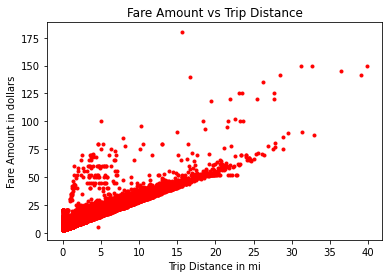

In [8]:
plt.scatter(df["trip distance"], df["fare amount"], c = "red", marker = ".")
p_df = df[["trip distance", "fare amount"]]
plt.ylabel("Fare Amount in dollars")
plt.xlabel("Trip Distance in mi")
plt.title("Fare Amount vs Trip Distance")
trip_time_vs_distance_corr = p_df.corr(method = "pearson", min_periods = 1).values[0][1]
trip_time_vs_distance_corr

0.844614696095107

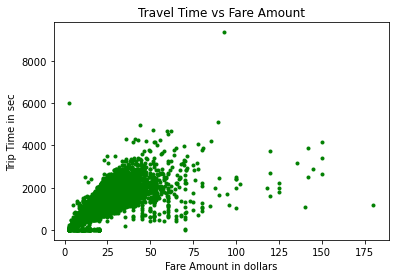

In [9]:
plt.scatter(df["fare amount"], df["trip time in secs"], c = "green", marker = ".")
p_df = df[["fare amount", "trip time in secs"]]
plt.ylabel("Trip Time in sec")
plt.xlabel("Fare Amount in dollars")
plt.title("Travel Time vs Fare Amount")
trip_time_vs_distance_corr = p_df.corr(method = "pearson", min_periods = 1).values[0][1]
trip_time_vs_distance_corr

## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation. 
* Use your model to predict the fare amount for a 3 miles trip. 



In [11]:
from sklearn.linear_model import LinearRegression
x = np.vstack((df["trip distance"],)).T
reg = LinearRegression().fit(x, df["fare amount"])
print("Coefficient:", reg.coef_[0], "Intercept:",
reg.intercept_)
print("Amount = " + str(reg.coef_[0]) + " * Distance + " + str(reg.intercept_))
predict = reg.coef_[0] * 3 + reg.intercept_
print("Prediction for 3 mile trip:", predict, "dollars")

Coefficient: 2.8560721570190273 Intercept: 3.7791142734046215
Amount = 2.8560721570190273 * Distance + 3.7791142734046215
Prediction for 3 mile trip: 12.347330744461702 dollars


## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, tavel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

In [12]:
from sklearn.linear_model import LinearRegression
x = np.vstack((df["trip distance"], df["trip time in secs"],)).T
reg = LinearRegression().fit(x, df["fare amount"])
print("Coefficient:", reg.coef_[0], "Intercept:",
reg.intercept_)
print("Amount = " + str(reg.coef_[0]) + " * Distance + " + str(reg.intercept_))
predict = reg.coef_[0] * 3 + reg.intercept_
print("Prediction for 3 mile trip with a 6 min travel time:", predict, "dollars")

Coefficient: 2.1505144247699746 Intercept: 2.011041303169046
Amount = 2.1505144247699746 * Distance + 2.011041303169046
Prediction for 3 mile trip with a 6 min travel time: 8.46258457747897 dollars


## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01 
* Print and visualize the optimization costs 
* Provide the Regression Coefficients of your model after stop or convergance. 

In [21]:
learningRate = 0.1
num_iteration = 400 
precision = 0.01
size = len(df["fare amount"])

# This is our regression coefficients. 
beta=np.zeros(2)

n = float(size)
#x_df = pd.DataFrame(index=range(size),columns=range(1))
x_df = np.ones(len(df["trip distance"]))
# print("Sample size", n)
x = np.vstack((df["trip distance"].values, x_df)).T
# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    prevCost = int(cost)
    cost = 0
    m_gradient = 0
    for j in range(size):
        y_prediction = np.dot(beta , x[j])
    
        # We compute costs just for monitoring 
        cost += ( df["fare amount"].values[j] - y_prediction)**2

        # calculate gradients. sum the gradients for all rows
        m_gradient += x[j] * (df["fare amount"].values[j] - y_prediction)
    
    m_gradient = (-1.0/n)* m_gradient
    
    print(i , "beta = ", beta, " Cost=", cost)
    
    if abs(prevCost-cost)<.01:
        break
    # update the weights - Regression Coefficients 
    beta = beta - learningRate * m_gradient
print("Amount = " + str(beta[0]) + " * Distance + " + str(beta[1]))

0 beta =  [0. 0.]  Cost= 11643351.4405
1 beta =  [6.19994482 1.26668547]  Cost= 7949736.345575251
2 beta =  [1.09979147 0.47735687]  Cost= 5488679.397278391
3 beta =  [5.21661683 1.35406526]  Cost= 3847696.464937079
4 beta =  [1.81898058 0.86199809]  Cost= 2752445.0115028094
5 beta =  [4.5510314  1.47643968]  Cost= 2020451.6461576854
6 beta =  [2.28610198 1.17925696]  Cost= 1530340.01007206
7 beta =  [4.09774279 1.6166103 ]  Cost= 1201366.6349857105
8 beta =  [2.58654466 1.44646828]  Cost= 979811.7761445664
9 beta =  [3.78654338 1.76360648]  Cost= 829928.9227250903
10 beta =  [2.77701261 1.67560621]  Cost= 727925.912741386
11 beta =  [3.57066662 1.91055937]  Cost= 657962.124840887
12 beta =  [2.89514076 1.87504197]  Cost= 609486.4048015242
13 beta =  [3.41894127 2.05329154]  Cost= 575466.6129914332
14 beta =  [2.96588918 2.05071596]  Cost= 551212.124428563
15 beta =  [3.31057317 2.1893821 ]  Cost= 533590.6615735551
16 beta =  [3.0057947  2.20692027]  Cost= 520507.37380679563
17 beta = 